In [110]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
import scipy
import time

In [120]:
fs = 44100
frequency_AM = 14000
sd.default.samplerate = fs
sd.default.channels = 1
signal = signalMeu()

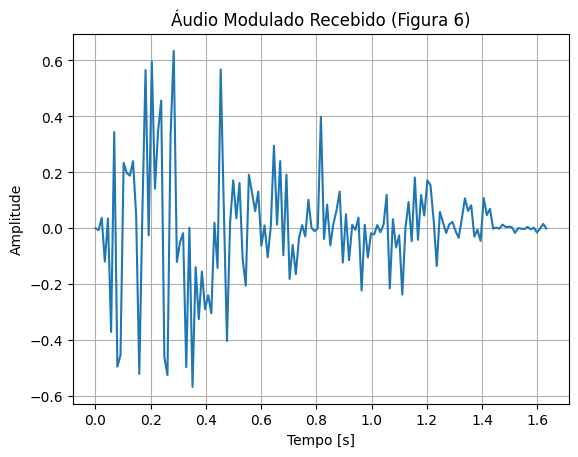

In [121]:
audio_modulated, samplerate = sf.read('./Waves/oh-my-god-meme-modulated.wav')
samples_audio = len(audio_modulated)
duration = samples_audio / fs
t_domain = np.linspace(0, duration, samples_audio)

plt.figure()
plt.plot(t_domain[::500], audio_modulated[::500])
plt.title('Áudio Modulado Recebido (Figura 6)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

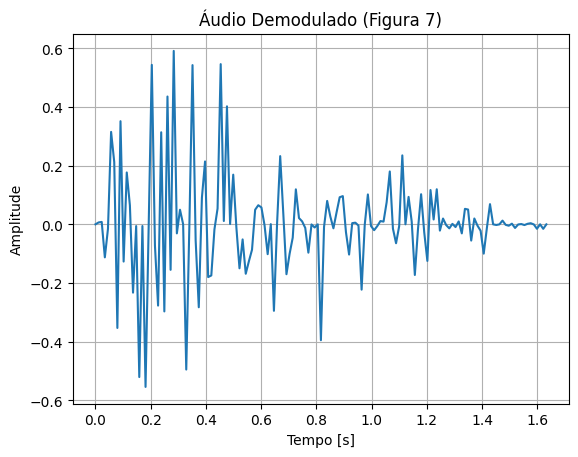

In [122]:
# Demodulando o audio modulado
A = 1
W = 2*np.pi*frequency_AM
sine = A*np.sin(W*t_domain)
audio_demodulated = audio_modulated*sine

plt.figure()
plt.plot(t_domain[::500], audio_demodulated[::500])
plt.title('Áudio Demodulado (Figura 7)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

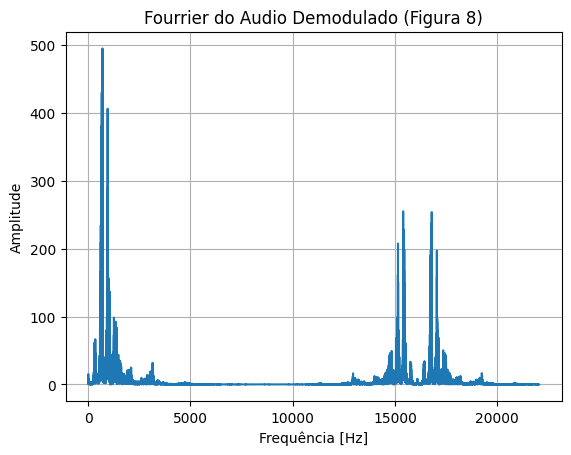

In [123]:
x, y = signal.calcFFT(audio_demodulated, fs)

# plota o grafico
plt.figure()
plt.plot(x, np.abs(y))
plt.title('Fourrier do Audio Demodulado (Figura 8)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 22000, 5000))
plt.grid()
plt.show()

### Utilizando a função feita na mão

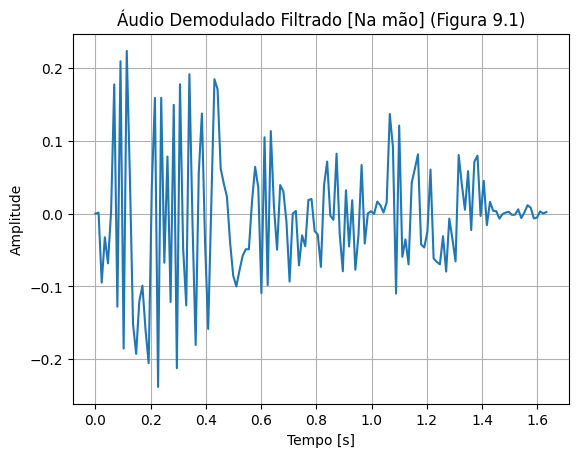

In [124]:
# b = [0.06905, 0.05192]  # Coeficientes do numerador
# a = [1, -1.304, 0.4253]  # Coeficientes do denominador
# filtered_audio_hand = scipy.signal.filtfilt(b, a, audio_demodulated)

a = 0.009235
b = 0.008398
c = 1
d = -1.734
e = 0.7521

y_filtered = np.zeros(samples_audio)

for k in range(2, samples_audio):
    y_filtered[k] = (-d * y_filtered[k - 1] - e * y_filtered[k - 2] + a * audio_demodulated[k - 1] + b * audio_demodulated[k - 2])

filtered_audio_hand = y_filtered

plt.figure()
plt.plot(t_domain[::500], filtered_audio_hand[::500])
plt.title('Áudio Demodulado Filtrado [Na mão] (Figura 9.1)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### Utilizando a função de filtro pronta

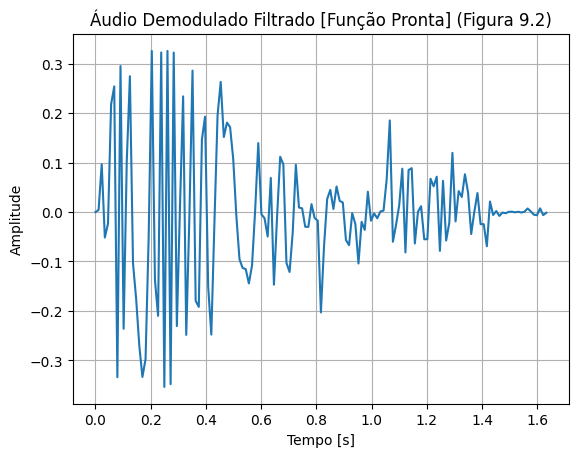

In [126]:
b, a = scipy.signal.butter(6, 1000, 'lowpass', fs=samplerate)
filtered_audio_easy = scipy.signal.filtfilt(b, a, audio_demodulated)
plt.figure()
plt.plot(t_domain[::500], filtered_audio_easy[::500])
plt.title('Áudio Demodulado Filtrado [Função Pronta] (Figura 9.2)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

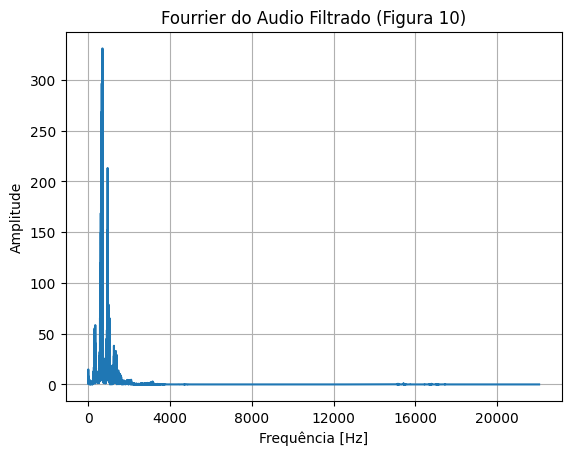

In [127]:
x, y = signal.calcFFT(filtered_audio_hand, fs)

# plota o grafico
plt.figure()
plt.plot(x, np.abs(y))
plt.title('Fourrier do Audio Filtrado (Figura 10)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 22000, 4000))
plt.grid()
plt.show()

In [130]:
print('Áudio Modulado original')
sd.play(audio_modulated, fs)
sd.wait()
print("Fim do áudio original\n")

time.sleep(0.5)

print('Áudio Demodulado e Filtrado na mão')
sd.play(filtered_audio_hand, fs)
sd.wait()
print("Fim do áudio mão\n")

time.sleep(0.5)

print('Áudio Demodulado e Filtrado com a função')
sd.play(filtered_audio_easy, fs)
sd.wait()
print("Fim do áudio função")

Áudio Modulado original
Fim do áudio original

Áudio Demodulado e Filtrado na mão
Fim do áudio mão

Áudio Demodulado e Filtrado com a função
Fim do áudio função
